**Write a program to predict the sales of a store.***


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [2]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
train=pd.read_csv("Train.csv")


In [3]:
print(train)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [5]:
train.shape

(8523, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
train['Item_Weight'].interpolate(inplace=True)
train['Item_Weight'].isna().sum()

0

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [12]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
train.Outlet_Establishment_Year.value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

Text(0, 0.5, 'Number of Sales')

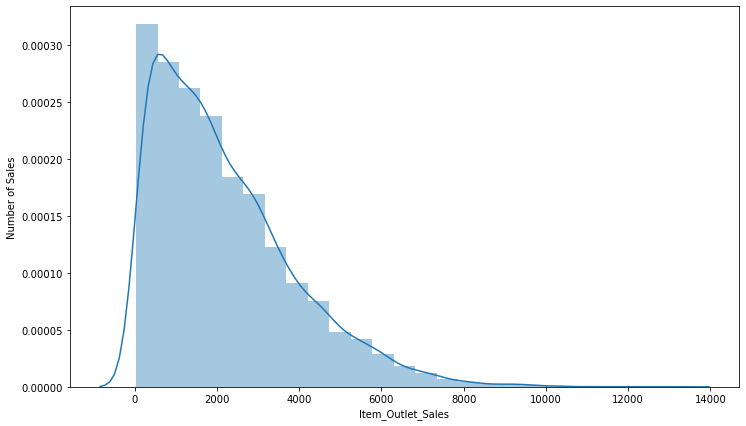

In [17]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.distplot(train.Item_Outlet_Sales,bins=25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")

In [18]:
corr=train.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012240,0.024839,0.001220,0.014536
Item_Visibility,-0.012240,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024839,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.001220,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014536,-0.128625,0.567574,-0.049135,1.000000


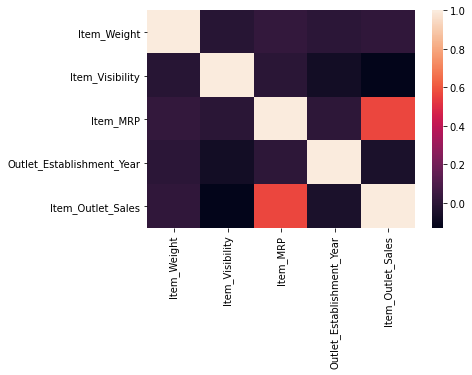

In [19]:
sns.heatmap(corr)

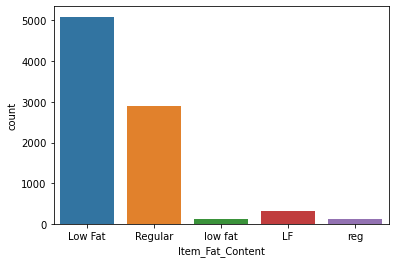

In [20]:
sns.countplot(train.Item_Fat_Content)

In [21]:
train.replace('low fat','Low Fat',inplace=True)
train.replace('LF','Low Fat',inplace=True)
train.replace(' reg ','Regular')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
train.drop(['Outlet_Size'],axis=1,inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Outlet']=le.fit_transform(train['Outlet_Identifier'])
var_mod=['Item_Fat_Content','Outlet_Type','Outlet']
for i in var_mod:
    train[i]=le.fit_transform(train[i])

In [25]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,1,3735.1380,9
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,2,443.4228,3
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,Tier 1,1,2097.2700,9
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,0,732.3800,0
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,Tier 3,1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,1,2778.3834,1
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,1,549.2850,7
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,1,1193.1136,6
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,2,1845.5976,3


In [50]:
train=pd.get_dummies(train)


In [29]:
from sklearn.linear_model import LinearRegression
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Type,Item_Outlet_Sales,Outlet,Item_Identifier_DRA12,Item_Identifier_DRA24,...,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.30,0,0.016047,249.8092,1999,1,3735.1380,9,0,0,...,0,0,0,0,0,0,1,1,0,0
1,5.92,1,0.019278,48.2692,2009,2,443.4228,3,0,0,...,1,0,0,0,0,0,0,0,0,1
2,17.50,0,0.016760,141.6180,1999,1,2097.2700,9,0,0,...,0,0,0,0,0,0,1,1,0,0
3,19.20,1,0.000000,182.0950,1998,0,732.3800,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.93,0,0.000000,53.8614,1987,1,994.7052,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [30]:
from sklearn.model_selection import train_test_split
Y=train['Item_Outlet_Sales']
train.drop(['Item_Outlet_Sales'],axis=1,inplace=True)
X=train

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [33]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [48]:
ypred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error
loss=(mean_squared_error(ypred,y_test))

In [49]:
loss

1.5884567107586025e+22